In [1]:
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import time

---

# Practice - Face & Eye Detection

Given an image of two people,
- Detect two faces,
- In each ROI of face, detect two eyes.

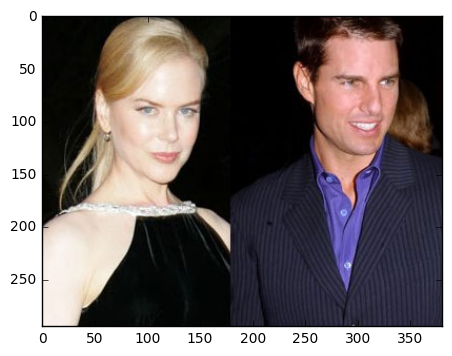

In [2]:
# Detect faces and eyes using these cascade classifiers
face_cascade = cv2.CascadeClassifier('detect/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('detect/haarcascade_eye.xml')

img = cv2.imread('../images/kidman-cruise.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

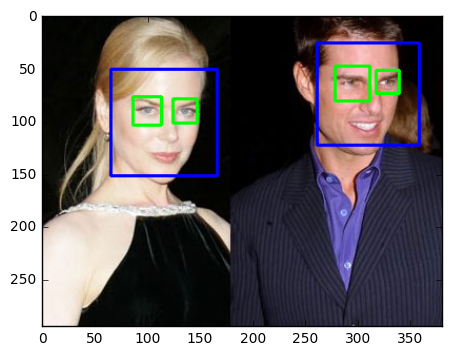

In [3]:
img = cv2.imread('../images/kidman-cruise.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#================ YOUR CODE HERE ===================
# Please tune 'scaleFactor' argument to detect all faces and eyes
face_cascade = cv2.CascadeClassifier('detect/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('detect/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.2,
        minNeighbors=5,
        minSize=(30, 30),
        flags = cv2.CASCADE_SCALE_IMAGE
)

# faces = face_cascade ...
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(
            roi_gray,
            scaleFactor=1.01,
            minNeighbors=5,
            minSize=(20, 20),
            flags = cv2.CASCADE_SCALE_IMAGE
    )
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
#===================================================
        
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))